In [1]:
import graphlab
import random
import math
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
random.seed(98103)
n = 30
x = graphlab.SArray([random.random() for i in range(n)]).sort()

This non-commercial license of GraphLab Create for academic use is assigned to fatimarochafr10@gmail.com and will expire on March 22, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\Fatima_2\AppData\Local\Temp\graphlab_server_1524784751.log.0


In [3]:
x

dtype: float
Rows: 30
[0.03957894495006575, 0.04156809967912256, 0.0724319480800758, 0.1502890446221763, 0.16133414450223427, 0.19195631279497838, 0.23283391714465285, 0.25990098016580054, 0.3801458148686865, 0.432444723507992, 0.47056698189428126, 0.4714946037956341, 0.47870640066103853, 0.49053553924712967, 0.5467800590828905, 0.5696803579782542, 0.6079324536462045, 0.6202375373443129, 0.630093133764472, 0.6450096693254694, 0.6467576040906915, 0.6990897790220533, 0.7902450464374043, 0.8103846511814395, 0.829320894073608, 0.8501115576007019, 0.8863684369527574, 0.8911410794245727, 0.9043884813966695, 0.9244858666003654]

In [4]:
y = x.apply(lambda x: math.sin(4*x))

In [5]:
y

dtype: float
Rows: 30
[0.15765527330715118, 0.16550731513895361, 0.28569137317201587, 0.5655963310738573, 0.6014673638641537, 0.6945723182799316, 0.8024177336626097, 0.8622036562183355, 0.9987395887969133, 0.9873888679370947, 0.9518836143289069, 0.9507399491702666, 0.9414033048470645, 0.9243965533386744, 0.8160088904398481, 0.759712729130455, 0.6517297472208435, 0.6136242987242347, 0.5820277559882728, 0.5325021703779891, 0.5265711949509843, 0.3384164444332101, -0.019386317630007324, -0.09977963765619023, -0.17478846590569042, -0.2559724913175498, -0.3929901249560022, -0.4104720422761508, -0.4581930879372578, -0.5280908755021222]

In [6]:
random.seed(1)
e = graphlab.SArray([random.gauss(0, 1.0/3.0) for i in range(n)])
y= y + e

In [7]:
data = graphlab.SFrame({'X1':x,'Y':y})

In [8]:
data

Columns:
	X1	float
	Y	float

Rows: 30

Data:
+-----------------+----------------+
|        X1       |       Y        |
+-----------------+----------------+
| 0.0395789449501 | 0.587050191026 |
| 0.0415680996791 | 0.648655851372 |
| 0.0724319480801 | 0.307803309485 |
|  0.150289044622 | 0.310748447417 |
|  0.161334144502 | 0.237409625496 |
|  0.191956312795 | 0.705017157224 |
|  0.232833917145 | 0.461716676992 |
|  0.259900980166 | 0.383260507851 |
|  0.380145814869 | 1.06517691429  |
|  0.432444723508 | 1.03184706949  |
+-----------------+----------------+
[30 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [9]:
def polynomial_features(data, deg):
    data_copy=data.copy()
    for i in range(1,deg):
        data_copy['X'+str(i+1)]=data_copy['X'+str(i)]*data_copy['X1']
    return data_copy

In [10]:
def regressao_polinomial_cume(data, deg, l2_penalty):

    model = graphlab.linear_regression.create(polynomial_features(data,deg), 

                                target='Y', l2_penalty=l2_penalty,

                                validation_set=None,verbose=False)

    return model

In [11]:
def print_coefficients(model):
    
    deg = len(model.coefficients['value'])-1
    w = list(model.coefficients['value'])
    
    print 'Coeficientes do polinomio de grau ' + str(deg) + ':'
    w.reverse()
    print numpy.poly1d(w)

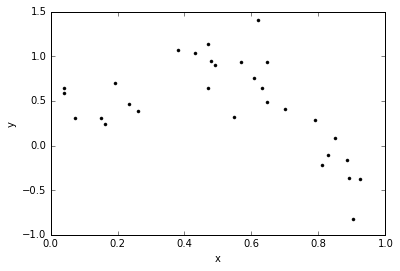

In [12]:
def plot_data(data):    
    plt.plot(data['X1'],data['Y'],'k.')
    plt.xlabel('x')
    plt.ylabel('y')

plot_data(data)

In [13]:
def plot_predicoes(data, model):
    plot_data(data)

    deg = len(model.coefficients['value'])-1
    
    x_pred = graphlab.SFrame({'X1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))
    
    plt.plot(x_pred['X1'], y_pred, 'g-', label='degree ' + str(deg) + 'fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

In [14]:
model = regressao_polinomial_cume(data, deg=16, l2_penalty=1e-25)
print_coefficients(model)

Coeficientes do polinomio de grau 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


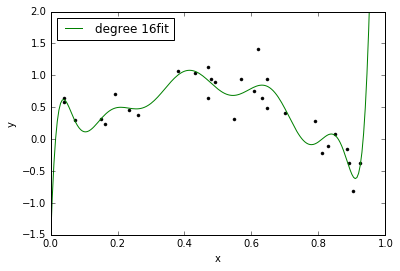

In [15]:
plot_predicoes(data, model)

In [16]:
model = regressao_polinomial_cume(data, deg=16, l2_penalty=100)
print_coefficients(model)

Coeficientes do polinomio de grau 16:
        16          15          14          13          12         11
-0.301 x  - 0.2802 x  - 0.2604 x  - 0.2413 x  - 0.2229 x  - 0.205 x 
           10          9          8          7          6           5
 - 0.1874 x  - 0.1699 x - 0.1524 x - 0.1344 x - 0.1156 x - 0.09534 x
            4           3           2
 - 0.07304 x - 0.04842 x - 0.02284 x - 0.002257 x + 0.6416


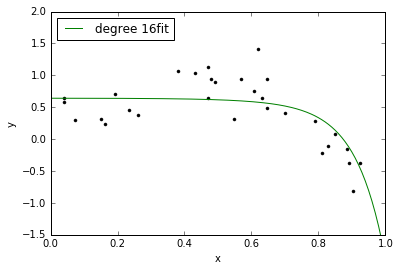

In [17]:
plot_predicoes(data, model)

lambda = 1.00e-25
Coeficientes do polinomio de grau 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


lambda = 1.00e-10
Coeficientes do polinomio de grau 16:
           16             15             14             13
4.975e+04 x  - 7.821e+04 x  - 2.265e+04 x  + 3.949e+04 x 
              12        11             10             9             8
 + 4.366e+04 x  + 3074 x  - 3.332e+04 x  - 2.786e+04 x + 1.032e+04 x
              7        6             5             4        3         2
 + 2.962e+04 x - 1440 x - 2.597e+04 x + 1.839e+04 x - 5596 x + 866.1 x - 65.19 x + 2.159


lambda = 1.00e-06
Coefi

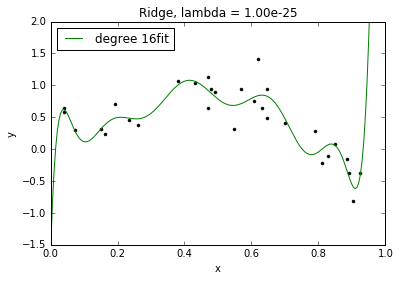

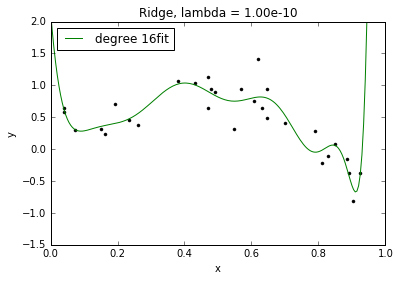

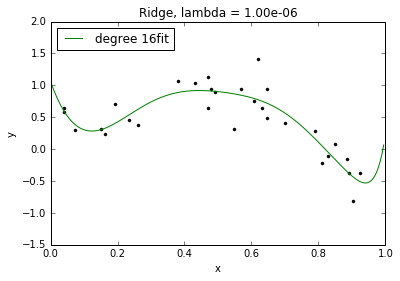

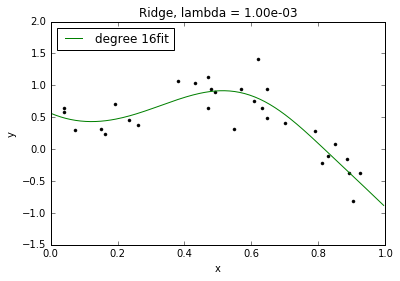

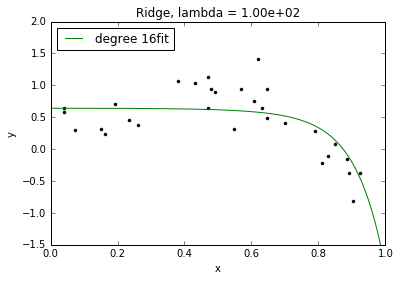

In [18]:
for l2_penalty in [1e-25, 1e-10, 1e-6, 1e-3, 1e2]:
    model = regressao_polinomial_cume(data, deg=16, l2_penalty=l2_penalty)
    print 'lambda = %.2e' % l2_penalty
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_predicoes(data,model)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)

In [19]:
#data = dados(y)
#num_folds = (k)

def loo(data, deg, l2_penalty_values):
    
    data = polynomial_features(data, deg)
    num_folds = len(data)
    folds = graphlab.cross_validation.KFold(data,num_folds)
    
    l2_penalty_mse = []
    min_mse = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mse = 0.0
        for train_set, validation_set in folds:
            model = graphlab.linear_regression.create(train_set,target='Y', 
                                                      l2_penalty=l2_penalty,
                                                      validation_set=None,verbose=False)
            
            y_test_predicted = model.predict(validation_set)
            next_mse += ((y_test_predicted-validation_set['Y'])**2).sum()
        
        next_mse = next_mse/num_folds
        l2_penalty_mse.append(next_mse)
        if min_mse is None or next_mse < min_mse:
            min_mse = next_mse
            best_l2_penalty = l2_penalty
            
    return l2_penalty_mse,best_l2_penalty

In [20]:
l2_penalty_values = numpy.logspace(-4, 10, num=10)

# Atividade 2

# Questão 1

In [21]:
k5 = graphlab.SFrame.copy(data[:5])
k10 = graphlab.SFrame.copy(data[:10])

In [22]:
k5

Columns:
	X1	float
	Y	float

Rows: 5

Data:
+-----------------+----------------+
|        X1       |       Y        |
+-----------------+----------------+
| 0.0395789449501 | 0.587050191026 |
| 0.0415680996791 | 0.648655851372 |
| 0.0724319480801 | 0.307803309485 |
|  0.150289044622 | 0.310748447417 |
|  0.161334144502 | 0.237409625496 |
+-----------------+----------------+
[5 rows x 2 columns]

In [23]:
k10

Columns:
	X1	float
	Y	float

Rows: 10

Data:
+-----------------+----------------+
|        X1       |       Y        |
+-----------------+----------------+
| 0.0395789449501 | 0.587050191026 |
| 0.0415680996791 | 0.648655851372 |
| 0.0724319480801 | 0.307803309485 |
|  0.150289044622 | 0.310748447417 |
|  0.161334144502 | 0.237409625496 |
|  0.191956312795 | 0.705017157224 |
|  0.232833917145 | 0.461716676992 |
|  0.259900980166 | 0.383260507851 |
|  0.380145814869 | 1.06517691429  |
|  0.432444723508 | 1.03184706949  |
+-----------------+----------------+
[10 rows x 2 columns]

In [24]:
l2_penalty_mse,best_l2_penalty =loo(data, 16, l2_penalty_values)
l2_penalty_mse_5,best_l2_penalty_5 = loo(k5, 16, l2_penalty_values)
l2_penalty_mse_10,best_l2_penalty_10 = loo(k10, 16, l2_penalty_values)

In [25]:
best_l2_penalty

0.12915496650148839

In [26]:
best_l2_penalty_5

4.641588833612782

In [27]:
best_l2_penalty_10

166.81005372000593

# Questão 2

lambda = 1.29e-01
Coeficientes do polinomio de grau 16:
       16         15          14          13          12           11
1.345 x  + 1.141 x  + 0.9069 x  + 0.6447 x  + 0.3569 x  + 0.04947 x 
           10          9          8         7         6         5
 - 0.2683 x  - 0.5821 x - 0.8701 x - 1.099 x - 1.216 x - 1.145 x
           4           3          2
 - 0.7837 x - 0.07406 x + 0.7614 x + 0.7703 x + 0.3918




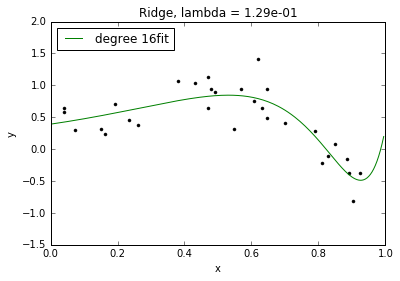

In [28]:
model = regressao_polinomial_cume(data, deg=16, l2_penalty=best_l2_penalty)
print 'lambda = %.2e' % best_l2_penalty
print_coefficients(model)
print '\n'
plt.figure()
plot_predicoes(data,model)
plt.title('Ridge, lambda = %.2e' % best_l2_penalty)

lambda = 1.29e-01
Coeficientes do polinomio de grau 16:
            16            15            14           13         12
-0.0001785 x  - 0.001003 x  - 0.005531 x  - 0.02973 x  - 0.154 x 
           11         10         9      8       7        6         5
 - 0.7543 x  - 3.356 x  - 12.21 x - 21 x + 199 x + 2891 x + 577.6 x
          4         3         2
 + 63.62 x - 7.904 x - 7.111 x - 1.981 x + 0.6424




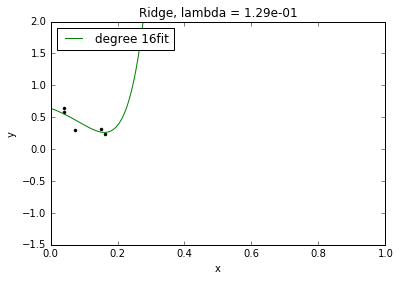

In [39]:
model_k5 = regressao_polinomial_cume(k5, deg=16, l2_penalty=best_l2_penalty)
print 'lambda = %.2e' % best_l2_penalty
print_coefficients(model_k5)
print '\n'
plt.figure()
plot_predicoes(k5,model_k5)
plt.title('Ridge, lambda = %.2e' % best_l2_penalty)

lambda = 1.29e-01
Coeficientes do polinomio de grau 16:
       16        15        14        13        12        11         10
-1186 x  - 2474 x  - 5020 x  - 9793 x  - 8572 x  - 2605 x  - 616.8 x 
         9         8         7        6         5        4         3
 - 36.9 x + 84.12 x + 77.85 x + 49.6 x + 26.76 x + 12.6 x + 4.708 x
          2
 + 0.509 x - 1.02 x + 0.5384




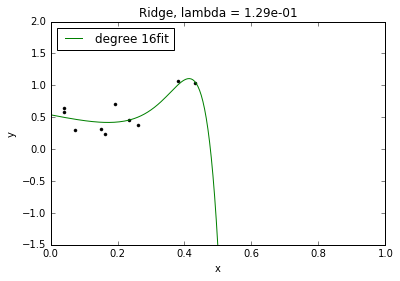

In [38]:
model_k10 = regressao_polinomial_cume(k10, deg=16, l2_penalty=best_l2_penalty)
print 'lambda = %.2e' % best_l2_penalty
print_coefficients(model_k10)
print '\n'
plt.figure()
plot_predicoes(k10,model_k10)
plt.title('Ridge, lambda = %.2e' % best_l2_penalty)